In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = load_digits(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [3]:
labeled = 50

log_reg = LogisticRegression()
log_reg.fit(X_train[: labeled], y_train[: labeled])

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(X_test, y_test)

0.7851851851851852

In [5]:
from sklearn.cluster import KMeans

In [6]:
k = 50

kmeans = KMeans(n_clusters = k)
kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
X_digits_dist = kmeans.transform(X_train)
X_representative_idx = np.argmin(X_digits_dist, axis = 0)
X_representative = X_train[X_representative_idx]

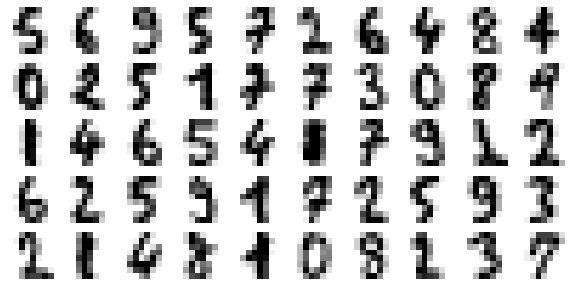

In [8]:
plt.figure(figsize = (10, 5))
for i in range(k):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_representative[i].reshape(8, 8), cmap = 'binary')
    plt.axis(False)

In [9]:
# In real world semi supervised learning there will no label or very few, so we have to manually labeled some of them. But for
# now because we have the label and we not want to label every time we run it so we will use the pre defined label.

# y_representative = np.array([
#     1, 0, 4, 2, 3, 1, 6, 7, 8, 5,
#     7, 5, 4, 1, 4, 8, 6, 3, 6, 7,
#     9, 2, 7, 2, 9, 1, 7, 7, 9, 9,
#     2, 5, 2, 3, 9, 8, 8, 9, 2, 5,
#     6, 8, 2, 5, 1, 4, 1, 4, 3, 1
# ])

y_representative = y_train[X_representative_idx]

In [10]:
y_train[X_representative_idx].reshape(5, 10)

array([[5, 6, 9, 5, 7, 2, 6, 4, 8, 4],
       [0, 2, 5, 1, 7, 7, 3, 0, 8, 9],
       [1, 4, 6, 5, 4, 1, 7, 9, 1, 2],
       [6, 2, 5, 9, 1, 7, 2, 5, 9, 3],
       [2, 1, 4, 8, 1, 0, 8, 2, 3, 7]])

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_representative, y_representative)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
log_reg.score(X_test, y_test)

0.8962962962962963

In [13]:
y_train_propagated = np.empty(len(X_train), dtype = 'int32')
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative[i]

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.score(X_test, y_test)

0.9074074074074074

In [16]:
percentile_closest = 20

In [17]:
X_cluster_dist = X_digits_dist.min(axis = 1)

In [18]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [19]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
log_reg.score(X_test, y_test)

0.9055555555555556

In [22]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9742647058823529